In [0]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

from IPython.display import Math, HTML
def enable_sympy_in_cell():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
from scipy import integrate
import sympy
sympy.init_printing()

In [3]:
from scipy.integrate import solve_ivp

$$
\begin{align*}
x'(t) &= \sigma(y - x)\\ 
y'(t) &= x(\rho - z) - y \\ 
z'(t) &= x y - \beta z
\end{align*}
$$

In [34]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

def g(t, xyz):
  return f(xyz, t, rho, sigma, beta)

def h(t, xyz):
  return f(xyz, t, rho, sigma, 0.6*beta)

def i(t,xyz):
  return f(xyz, t, rho, 2*sigma, 0.6*beta)

In [76]:
x0, y0, z0 = [1.0, 1.0, 1.0]
time = np.linspace(0,25,1000)
tspan = (0, 25)
rho, sigma, beta = 28, 8, 8/3.0

In [77]:
xyz1 = integrate.solve_ivp(g, tspan, [x0, y0, z0], t_eval=time)
xyz2 = integrate.solve_ivp(h, tspan, [x0, y0, z0], t_eval=time)
xyz3 = integrate.solve_ivp(i, tspan, [x0, y0, z0], t_eval=time)

In [69]:
from mpl_toolkits.mplot3d import Axes3D

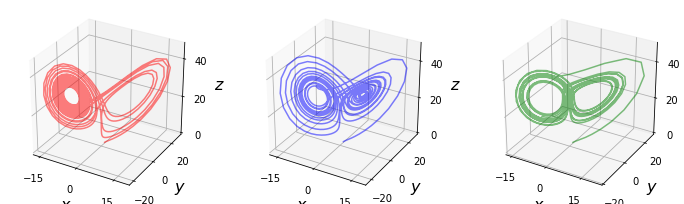

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz.y[0], xyz.y[1], xyz.y[2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])